In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

init_test_length = len(test)

In [3]:
train['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

In [4]:
train.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [5]:
bag = {'ARS' : ['SNP_02','SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'],
       'BTB' : ['SNP_10','SNP_13'],
       'HAP' : ['SNP_07','SNP_12','SNP_14'],
       'BOV' : ['SNP_05','SNP_06','SNP_08','SNP_15']
}

for i in range(len(train)):
    for item in bag:
        tar = ''
        for chrom in bag[item]:
            tar += train.loc[i,chrom] + ' '
        train.loc[i,item] = tar
        
for i in range(len(test)):
    for item in bag:
        tar = ''
        for chrom in bag[item]:
            tar += test.loc[i,chrom] + ' '
        test.loc[i,item] = tar

In [6]:
chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']
chrom9 = ['SNP_12', 'SNP_13', 'SNP_14']

for i in range(len(train)):
    tar = '' 
    for chrom in chrom6:
        tar += train.loc[i,chrom] + ' '
    train.loc[i,'chrom6'] = tar

for i in range(len(train)):
    tar = '' 
    for chrom in chrom9:
        tar += train.loc[i,chrom] + ' '
    train.loc[i,'chrom9'] = tar
    
for i in range(len(test)):
    tar = '' 
    for chrom in chrom6:
        tar += test.loc[i,chrom] + ' '
    test.loc[i,'chrom6'] = tar

for i in range(len(test)):
    tar = '' 
    for chrom in chrom9:
        tar += test.loc[i,chrom] + ' '
    test.loc[i,'chrom9'] = tar
    
# print(train['chrom9'].value_counts())
# print(test['chrom9'].value_counts())

In [7]:
tar = list(train.columns)
# tar.pop(tar.index('id'))
df1 = train.loc[:,tar]
df2 = train.loc[:,tar]


for idx in range(1,10):
    for i in range(len(train)):
        df1.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
        df1.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        df2.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[1]
        df2.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(train)):
        df1.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
        df1.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]
        df2.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[1]
        df2.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[0]

train = pd.concat([df1,df2],axis=0)

tar = list(test.columns)
# tar.pop(tar.index('id'))
df1 = test.loc[:,tar]
df2 = test.loc[:,tar]
        
for idx in range(1,10):
    for i in range(len(test)):
        df1.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
        df1.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        df2.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[1]
        df2.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[0]
for idx in range(10,16):
    for i in range(len(test)):
        df1.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
        df1.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]
        df2.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[1]
        df2.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[0]    

test = pd.concat([df1,df2],axis=0)


# chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += train.loc[i,chrom]
#     train.loc[i,'chrom6'] = tar

train.columns



Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class',
       'ARS', 'BTB', 'HAP', 'BOV', 'chrom6', 'chrom9', 'SNP_01_x', 'SNP_01_y',
       'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y', 'SNP_04_x', 'SNP_04_y',
       'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y', 'SNP_07_x', 'SNP_07_y',
       'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y', 'SNP_10_x', 'SNP_10_y',
       'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y', 'SNP_13_x', 'SNP_13_y',
       'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y'],
      dtype='object')

In [8]:
df1.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'ARS',
       'BTB', 'HAP', 'BOV', 'chrom6', 'chrom9', 'SNP_01_x', 'SNP_01_y',
       'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y', 'SNP_04_x', 'SNP_04_y',
       'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y', 'SNP_07_x', 'SNP_07_y',
       'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y', 'SNP_10_x', 'SNP_10_y',
       'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y', 'SNP_13_x', 'SNP_13_y',
       'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y'],
      dtype='object')

In [9]:
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_11_x,SNP_11_y,SNP_12_x,SNP_12_y,SNP_13_x,SNP_13_y,SNP_14_x,SNP_14_y,SNP_15_x,SNP_15_y
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A,G,A,A,A,A,A,A,A,A
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A,A,G,A,G,G,A,A,A,A
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A,A,A,A,A,A,A,A,A,A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G,G,G,G,G,G,A,A,G,G
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A,A,A,A,A,G,A,A,G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,G,A,A,G,A,A,A,A,A,A
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G,A,A,A,G,A,A,A,A,G
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G,G,G,G,G,G,A,C,G,G
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G,A,A,G,G,G,A,C,G,G


In [10]:
# # train = train[train['class']!='A']
# # test = test[test['trait']==2]
# le = preprocessing.LabelEncoder()
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#       'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
#        'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
#        'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
#        'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
#        'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
#        'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
#        'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
#        'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
#        'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
#        'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
#        'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
#        'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV']
# for col in tar:
#     le.fit(test[col])
#     test[col] = le.transform(test[col])
    
# tar = ['SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
#        'SNP_01_x', 'SNP_01_y', 'SNP_01_x_y', 'SNP_01_y_x', 'SNP_02_x',
#        'SNP_02_y', 'SNP_02_x_y', 'SNP_02_y_x', 'SNP_03_x', 'SNP_03_y',
#        'SNP_03_x_y', 'SNP_03_y_x', 'SNP_04_x', 'SNP_04_y', 'SNP_04_x_y',
#        'SNP_04_y_x', 'SNP_05_x', 'SNP_05_y', 'SNP_05_x_y', 'SNP_05_y_x',
#        'SNP_06_x', 'SNP_06_y', 'SNP_06_x_y', 'SNP_06_y_x', 'SNP_07_x',
#        'SNP_07_y', 'SNP_07_x_y', 'SNP_07_y_x', 'SNP_08_x', 'SNP_08_y',
#        'SNP_08_x_y', 'SNP_08_y_x', 'SNP_09_x', 'SNP_09_y', 'SNP_09_x_y',
#        'SNP_09_y_x', 'SNP_10_x', 'SNP_10_y', 'SNP_10_x_y', 'SNP_10_y_x',
#        'SNP_11_x', 'SNP_11_y', 'SNP_11_x_y', 'SNP_11_y_x', 'SNP_12_x',
#        'SNP_12_y', 'SNP_12_x_y', 'SNP_12_y_x', 'SNP_13_x', 'SNP_13_y',
#        'SNP_13_x_y', 'SNP_13_y_x', 'SNP_14_x', 'SNP_14_y', 'SNP_14_x_y',
#        'SNP_14_y_x', 'SNP_15_x', 'SNP_15_y', 'SNP_15_x_y', 'SNP_15_y_x','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV','class']
# for col in tar:
#     le.fit(train[col])
#     train[col] = le.transform(train[col])

In [11]:
test.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'ARS',
       'BTB', 'HAP', 'BOV', 'chrom6', 'chrom9', 'SNP_01_x', 'SNP_01_y',
       'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y', 'SNP_04_x', 'SNP_04_y',
       'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y', 'SNP_07_x', 'SNP_07_y',
       'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y', 'SNP_10_x', 'SNP_10_y',
       'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y', 'SNP_13_x', 'SNP_13_y',
       'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y'],
      dtype='object')

In [12]:
test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_11_x,SNP_11_y,SNP_12_x,SNP_12_y,SNP_13_x,SNP_13_y,SNP_14_x,SNP_14_y,SNP_15_x,SNP_15_y
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,...,A,G,G,A,G,G,C,A,G,A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,...,A,G,A,A,A,A,A,A,A,A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,...,A,A,G,A,G,G,A,A,G,G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,...,A,A,G,A,A,G,A,A,A,A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,...,G,G,G,A,G,G,A,A,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,...,G,G,A,A,A,A,A,A,A,G
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,...,A,A,A,A,G,A,A,A,A,G
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,...,G,A,A,A,G,A,A,A,G,G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,...,G,A,A,A,A,A,A,A,A,A


In [13]:

tar = ['father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02', 'SNP_03',
       'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10',
       'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'ARS', 'BTB', 'HAP',
       'BOV', 'chrom6', 'chrom9', 'SNP_01_x', 'SNP_01_y', 'SNP_02_x',
       'SNP_02_y', 'SNP_03_x', 'SNP_03_y', 'SNP_04_x', 'SNP_04_y', 'SNP_05_x',
       'SNP_05_y', 'SNP_06_x', 'SNP_06_y', 'SNP_07_x', 'SNP_07_y', 'SNP_08_x',
       'SNP_08_y', 'SNP_09_x', 'SNP_09_y', 'SNP_10_x', 'SNP_10_y', 'SNP_11_x',
       'SNP_11_y', 'SNP_12_x', 'SNP_12_y', 'SNP_13_x', 'SNP_13_y', 'SNP_14_x',
       'SNP_14_y', 'SNP_15_x', 'SNP_15_y']
tp = []
for col in tar:
    tp.append(list(test[col].value_counts().index))
tp

temp = []
for i in tp:
    temp.extend(i)


In [14]:

tar = ['SNP_01', 'SNP_02', 'SNP_03',
       'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10',
       'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'ARS', 'BTB', 'HAP',
       'BOV', 'chrom6', 'chrom9', 'SNP_01_x', 'SNP_01_y', 'SNP_02_x',
       'SNP_02_y', 'SNP_03_x', 'SNP_03_y', 'SNP_04_x', 'SNP_04_y', 'SNP_05_x',
       'SNP_05_y', 'SNP_06_x', 'SNP_06_y', 'SNP_07_x', 'SNP_07_y', 'SNP_08_x',
       'SNP_08_y', 'SNP_09_x', 'SNP_09_y', 'SNP_10_x', 'SNP_10_y', 'SNP_11_x',
       'SNP_11_y', 'SNP_12_x', 'SNP_12_y', 'SNP_13_x', 'SNP_13_y', 'SNP_14_x',
       'SNP_14_y', 'SNP_15_x', 'SNP_15_y']
tp = []
for col in tar:
    tp.append(list(test[col].value_counts().index))
# temp = []
# for i in tp:
#    temp.extend(i)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le.fit(sorted(list(set(temp))))
for col in tar:
    le.fit(test[col])
    test[col] = le.transform(test[col])
    
tp = []
for col in tar:
    tp.append(list(train[col].value_counts().index))
temp = []
for i in tp:
    temp.extend(i)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(sorted(list(set(temp))))
for col in tar:
    le.fit(train[col])
    train[col] = le.transform(train[col])

le.fit(train['class'])
train['class'] = le.transform(train['class'])

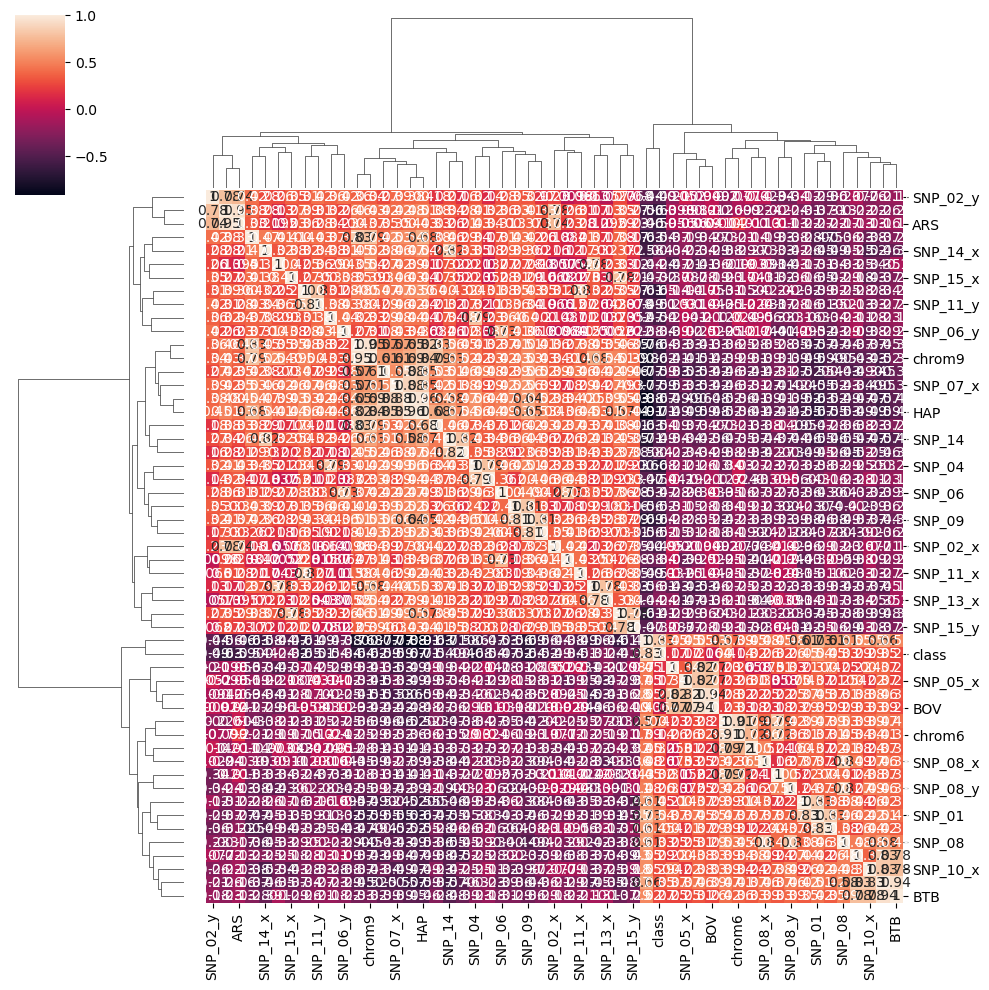

In [15]:
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y','chrom6','chrom9','ARS', 'BTB', 'HAP', 'BOV','class']
sns.clustermap(train.loc[:,target].corr(),annot=True)

In [16]:
train.loc[:,target].corr()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,...,SNP_14_y,SNP_15_x,SNP_15_y,chrom6,chrom9,ARS,BTB,HAP,BOV,class
trait,1.000000,0.732876,-0.558326,0.568742,-0.604016,0.548950,-0.527008,-0.876010,0.608936,-0.687985,...,-0.580671,-0.474739,-0.474739,0.387481,-0.798804,-0.459142,0.522376,-0.912889,0.431344,0.826978
SNP_01,0.732876,1.000000,-0.367094,0.471602,-0.384073,0.449491,-0.432030,-0.627443,0.460054,-0.460103,...,-0.452859,-0.349189,-0.349189,0.372753,-0.593898,-0.269992,0.418970,-0.666209,0.353818,0.538009
SNP_02,-0.558326,-0.367094,1.000000,-0.260399,0.405666,-0.119215,0.357868,0.478507,-0.295916,0.410250,...,0.281122,0.268896,0.268896,-0.098581,0.432781,0.946318,-0.229512,0.511269,-0.011747,-0.627540
SNP_03,0.568742,0.471602,-0.260399,1.000000,-0.341657,0.282002,-0.347028,-0.518701,0.526315,-0.417378,...,-0.384689,-0.230685,-0.230685,0.911131,-0.390845,0.014029,0.422576,-0.517846,0.226965,0.403247
SNP_04,-0.604016,-0.384073,0.405666,-0.341657,1.000000,-0.260659,0.456988,0.555693,-0.286681,0.513975,...,0.353929,0.226166,0.226166,0.030285,0.424701,0.431437,-0.233038,0.558594,-0.126776,-0.681239
SNP_05,0.548950,0.449491,-0.119215,0.282002,-0.260659,1.000000,-0.340798,-0.598221,0.308640,-0.346092,...,-0.340763,-0.277828,-0.277828,0.315467,-0.505417,-0.068878,0.310454,-0.592108,0.944826,0.207899
SNP_06,-0.527008,-0.432030,0.357868,-0.347028,0.456988,-0.340798,1.000000,0.472210,-0.398591,0.490965,...,0.294484,0.275967,0.275967,-0.162736,0.421991,0.313451,-0.305012,0.487846,-0.039192,-0.472931
SNP_07,-0.876010,-0.627443,0.478507,-0.518701,0.555693,-0.598221,0.472210,1.000000,-0.490662,0.637505,...,0.474181,0.429253,0.429253,-0.364643,0.687061,0.396403,-0.447964,0.963528,-0.481234,-0.668755
SNP_08,0.608936,0.460054,-0.295916,0.526315,-0.286681,0.308640,-0.398591,-0.490662,1.000000,-0.485897,...,-0.451493,-0.291742,-0.291742,0.454574,-0.496330,-0.165732,0.489058,-0.527420,0.294045,0.327988
SNP_09,-0.687985,-0.460103,0.410250,-0.417378,0.513975,-0.346092,0.490965,0.637505,-0.485897,1.000000,...,0.360873,0.285398,0.285398,-0.233527,0.527033,0.371708,-0.358829,0.650409,-0.221275,-0.641171


In [17]:
# BOV,SNP_13_y

In [18]:
# # train = pd.read_csv('./train.csv')
# target = ['trait', 'SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15','class'] # test 내부 컬럼이 모두 사용됬습니다.
# comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
# train4.to_csv(f'./comp_train.csv')
# test4.to_csv(f'./comp_test.csv')

# target = [ 'id','trait','SNP_01', 'SNP_02',
#        'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
#        'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']
# # test = pd.read_csv('./test.csv')
# tp = test.loc[:,['id']]
# test = test.loc[:,target]
# test = test.drop('id',axis=1)
# test.to_csv('./test_target.csv')

# ###############################################

# clf = ak.StructuredDataClassifier(
#     max_trials=5,  # 10회 생성
#     overwrite=True,
# )
# # 몇가지 옵션요소가 있습니다.
# # https://autokeras.com/

# clf.fit(
#     f'./comp_train.csv', # train path
#     "class", # label
#     epochs=200,
# )

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [19]:
# train = pd.read_csv('./train.csv')
target = ['trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
          'ARS', 'BTB', 'HAP', 'BOV'
          ,'class'] # test 내부 컬럼이 모두 사용됬습니다.

comp4 = train.loc[:,target]
# train4, test4 = train_test_split(comp4, test_size=0.1, random_state=21)
comp4.to_csv(f'./comp_train.csv')
# test.to_csv(f'./comp_test.csv')

target = [ 'id','trait','SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
         'ARS', 'BTB', 'HAP', 'BOV']

# test = pd.read_csv('./test.csv')
tp = test.loc[:,['id']]
test = test.loc[:,target]
test = test.drop('id',axis=1)
test.to_csv('./test_target.csv')

###############################################

clf = ak.StructuredDataClassifier(
    max_trials=5,  # 10회 생성
    overwrite=True,
)
# 몇가지 옵션요소가 있습니다.
# https://autokeras.com/

clf.fit(
    f'./comp_train.csv', # train path
    "class", # label
    epochs=50,
)

# predicted_y = clf.predict(f'./comp_test.csv') # valid path
# print(clf.evaluate(f'./comp_test.csv', "class"))
model = clf.export_model()
pred = model.predict(pd.read_csv('./test_target.csv')) # test path

Trial 5 Complete [00h 00m 07s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 31s
INFO:tensorflow:Oracle triggered exit
Epoch 1/50
17/17 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.5305
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.7748
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8760
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.9122
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.9313
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9523
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9561
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9561
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - 

In [20]:
# print(clf.evaluate(f'./comp_test.csv', "class"))
# model = clf.export_model()
# pred = model.predict(pd.read_csv('./test_target.csv')) # test path

In [21]:
part1 = pred[:init_test_length]
part2 = pred[init_test_length:]
len(part1) == len(part2)
pred = []
for i in range(len(part1)):
    tmp = []
    for j in range(3):
        tmp.append((part1[i][j] + part2[i][j])/2)
    pred.append(tmp)

pred

[[0.9997656345367432, 4.614103545463877e-06, 0.00022981442452874035],
 [2.521783137865441e-08, 0.9999997019767761, 2.390858639955695e-07],
 [0.0009785174624994397, 5.372276791604236e-05, 0.9989676475524902],
 [2.104804661939852e-05, 0.9883351922035217, 0.011643846519291401],
 [0.9999945759773254, 4.650050868804101e-07, 4.9274285629508086e-06],
 [3.4040698665194213e-05, 0.9304901957511902, 0.06947571784257889],
 [0.00042511202627792954, 1.1150592399644665e-05, 0.9995637536048889],
 [2.2957257783673413e-07, 0.9999921917915344, 7.4540193963912316e-06],
 [0.9998607635498047, 4.297708144918033e-08, 0.000139255789690651],
 [0.9999977946281433, 2.0305849446344837e-08, 2.201815732405521e-06],
 [3.421735891606659e-05, 0.00015070074005052447, 0.9998152256011963],
 [0.00032889892463572323, 0.9996567964553833, 1.4256053873396013e-05],
 [0.011550507508218288, 0.9219605922698975, 0.0664888545870781],
 [0.9999873042106628, 1.9407036688789958e-07, 1.242794496647548e-05],
 [0.00026315730065107346, 0.89

In [29]:
tp = tp.iloc[:init_test_length,:]
aa = [le.inverse_transform([np.argmax(i)])[0] for i in pred]
tp['class'] = aa

# submission 형식을 맞춰주세요
tp = tp.set_index('id')

tp.to_csv('./comp_ans.csv')
pd.read_csv('./comp_ans.csv')['class'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_30776\2816186165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp['class'] = aa


B    85
A    51
C    39
Name: class, dtype: int64

B    86
A    51
C    38

In [ ]:
# aa = []
# for i in pred:
#     if i > 0.5:
#         aa.append(0)
#     else:
#         aa.append(1)

# aa = [le.inverse_transform([i])[0] for i in aa]
# tp['class'] = aa
# tp = tp.set_index('id')


In [30]:
tp = tp.reset_index()
tp

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [37]:
hi = pd.read_csv('./sample_submission.csv')
hi['class'] = aa
hi = hi.set_index('id')
hi.to_csv('./submission.csv')
pd.read_csv('./submission.csv')

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [38]:
# hi['class'] = hi.merge(tp,on='id',how='outer').fillna('A')['class_y']
# hi = hi.set_index('id')
# hi.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')

---

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
for idx in range(1,10):
    for i in range(len(train)):
        train.loc[i,f'SNP_0{idx}_x'] = train.loc[i,f'SNP_0{idx}'].split()[0]
        train.loc[i,f'SNP_0{idx}_y'] = train.loc[i,f'SNP_0{idx}'].split()[1]

for idx in range(10,16):
    for i in range(len(train)):
        train.loc[i,f'SNP_{idx}_x'] = train.loc[i,f'SNP_{idx}'].split()[0]
        train.loc[i,f'SNP_{idx}_y'] = train.loc[i,f'SNP_{idx}'].split()[1]

for idx in range(1,10):
    for i in range(len(test)):
        test.loc[i,f'SNP_0{idx}_x'] = test.loc[i,f'SNP_0{idx}'].split()[0]
        test.loc[i,f'SNP_0{idx}_y'] = test.loc[i,f'SNP_0{idx}'].split()[1]

for idx in range(10,16):
    for i in range(len(test)):
        test.loc[i,f'SNP_{idx}_x'] = test.loc[i,f'SNP_{idx}'].split()[0]
        test.loc[i,f'SNP_{idx}_y'] = test.loc[i,f'SNP_{idx}'].split()[1]    

# chrom6 = ['SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09']
# chrom9 = ['SNP_12', 'SNP_13', 'SNP_14']

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += train.loc[i,chrom] + ' '
#     train.loc[i,'chrom6'] = tar

# for i in range(len(train)):
#     tar = '' 
#     for chrom in chrom9:
#         tar += train.loc[i,chrom] + ' '
#     train.loc[i,'chrom9'] = tar
    
# for i in range(len(test)):
#     tar = '' 
#     for chrom in chrom6:
#         tar += test.loc[i,chrom] + ' '
#     test.loc[i,'chrom6'] = tar

# for i in range(len(test)):
#     tar = '' 
#     for chrom in chrom9:
#         tar += test.loc[i,chrom] + ' '
#     test.loc[i,'chrom9'] = tar        
        
# bag = {'ARS' : ['SNP_02','SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'],
#        'BTB' : ['SNP_10','SNP_13'],
#        'HAP' : ['SNP_07','SNP_12','SNP_14'],
#        'BOV' : ['SNP_05','SNP_06','SNP_08','SNP_15']
# }

# for i in range(len(train)):
#     for item in bag:
#         tar = ''
#         for chrom in bag[item]:
#             tar += train.loc[i,chrom] + ' '
#         train.loc[i,item] = tar
        
# for i in range(len(test)):
#     for item in bag:
#         tar = ''
#         for chrom in bag[item]:
#             tar += test.loc[i,chrom] + ' '
#         test.loc[i,item] = tar
        
# train.columns

In [ ]:
# train = train[train['class']!='A']
# test = test[test['trait']==2]
le = preprocessing.LabelEncoder()
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
       'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y']
for col in tar:
    le.fit(test[col])
    test[col] = le.transform(test[col])
    
tar = ['SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',
       'SNP_01_x', 'SNP_01_y', 'SNP_02_x', 'SNP_02_y', 'SNP_03_x', 'SNP_03_y',
       'SNP_04_x', 'SNP_04_y', 'SNP_05_x', 'SNP_05_y', 'SNP_06_x', 'SNP_06_y',
       'SNP_07_x', 'SNP_07_y', 'SNP_08_x', 'SNP_08_y', 'SNP_09_x', 'SNP_09_y',
       'SNP_10_x', 'SNP_10_y', 'SNP_11_x', 'SNP_11_y', 'SNP_12_x', 'SNP_12_y',
       'SNP_13_x', 'SNP_13_y', 'SNP_14_x', 'SNP_14_y', 'SNP_15_x', 'SNP_15_y', 'class']
for col in tar:
    le.fit(train[col])
    train[col] = le.transform(train[col])

In [ ]:
y = train['class']
x = train.drop(['id','class'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=500,random_state=10)
rf.fit(x,y)

In [ ]:
test = test.drop('id',axis=1)
rf.predict(test)

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x,y)
lgb.predict(test)

In [ ]:
[rf.predict(test) == lgb.predict(test)]

In [ ]:
sub = pd.read_csv('./sample_submission.csv').set_index('id')
sub['class'] = le.inverse_transform(rf.predict(test))
sub.to_csv('./submission.csv')

In [ ]:
pd.read_csv('./submission.csv')

In [ ]:
# test = test.drop('id',axis=1)

In [ ]:
# pd.DataFrame(rf.predict(test))

In [ ]:
# [np.argmax(i) for i in pred] == rf.predict(test)

In [ ]:
# tar.pop()
# tp = pd.DataFrame([[np.argmax(i) for i in pred] == rf.predict(test)]).transpose()
# tp[tp[0] == False]

In [ ]:
# sum([np.argmax(i) for i in pred] == rf.predict(test))/len(test)

In [ ]:
# [le.inverse_transform([i])[0] for i in rf.predict(test)]

In [ ]:
# pd.read_csv('./sample_submission.csv')

In [ ]:
# tp = pd.read_csv('./sample_submission.csv')

# aa = [le.inverse_transform([i])[0] for i in rf.predict(test)]
# tp['class'] = aa

# # submission 형식을 맞춰주세요
# tp = tp.set_index('id')

# tp.to_csv('./submission.csv')
# pd.read_csv('./submission.csv')